<img src="https://assets.cntraveller.in/photos/60ba22be0f3a5367ec9fe7be/16:9/w_1280,c_limit/Yulu-1366x768.jpg" align="center">

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Dataset:**

Dataset Link: yulu_data.txt

**Column Profiling:**

*   datetime: datetime

*   season: season (1: spring, 2: summer, 3: fall, 4: winter)

*   holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*   temp: temperature in Celsius

*   atemp: feeling temperature in Celsius

*   humidity: humidity

*   windspeed: wind speed

*   casual: count of casual users

*   registered: count of registered users

*   count: count of total rental bikes including both casual and registered

**Problem Statement**

The company wants to know:

*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

*   How well those variables describe the electric cycle demands

# *Importing Libraries and Dataset*

In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import io
warnings.filterwarnings('ignore')

**Loading Data into Colab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing.txt to bike_sharing (3).txt


In [ ]:
yulu = pd.read_csv(io.StringIO(uploaded['bike_sharing.txt'].decode('utf-8')))

**Inspecting First Few Rows of the DataFrame**

In [ ]:
yulu.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


**Let's look at the datatype and the number of non-null values in the aerofit dataframe**

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**So none of the columns in the dataset have null values**

### **Data Type Conversion**

**The data type of datetime should be in datetime format**

**At the same time season, holiday, workingday, weather should in object format as they are categorical in nature**

In [ ]:
# Type Conversion

yulu['datetime']= pd.to_datetime(yulu['datetime'])
yulu['season']= yulu['season'].map(str)
yulu['holiday']= yulu['holiday'].map(str)
yulu['workingday']= yulu['workingday'].map(str)
yulu['weather']= yulu['weather'].map(str)

### **Data Mapping of Categorical Variables**

In [ ]:
# Data Mapping

season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
yulu["season"] = yulu["season"].map(lambda x: season_mapping[x])

holiday_mapping = {'0':'no', '1':'yes'}
yulu["holiday"] = yulu["holiday"].map(lambda x: holiday_mapping[x])

working_day_mapping = {'0':'no', '1':'yes'}
yulu["workingday"] = yulu["workingday"].map(lambda x: working_day_mapping[x])

weather_mapping = {'1':'clear', '2':'partly_clear', '3':'rain', '4':'intense'}
yulu["weather"] = yulu["weather"].map(lambda x: weather_mapping[x])

# **Data Preprocessing**

### **Summary Statistics of Dataset**

In [ ]:
yulu.describe(include = ['object','datetime64[ns]'])

,datetime,season,holiday,workingday,weather
count,10886,10886,10886,10886,10886
unique,10886,4,2,2,4
top,2011-01-01 00:00:00,winter,no,yes,clear
freq,1,2734,10575,7412,7192
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN


**The dataset has values between 1st Jan 2011 to 19th Dec 2012**

In [ ]:
yulu.describe(include = ['int64','float64'])

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### **Unique Values in each column**

Before we move ahead, let's identify the number of unique values in each column

In [ ]:
for i in yulu.columns:
  print(f'{i} has {yulu[i].nunique()} unique values')

datetime has 10886 unique values
season has 4 unique values
holiday has 2 unique values
workingday has 2 unique values
weather has 4 unique values
temp has 49 unique values
atemp has 60 unique values
humidity has 89 unique values
windspeed has 28 unique values
casual has 309 unique values
registered has 731 unique values
count has 822 unique values


### **Checking Duplicate Rows**

Before we move ahead, let's identify if there are any duplicate rows

In [ ]:
yulu.duplicated().any()

False

**So, there are no duplicate rows in the dataset**

### **Univariate Analysis for Categorical Columns**

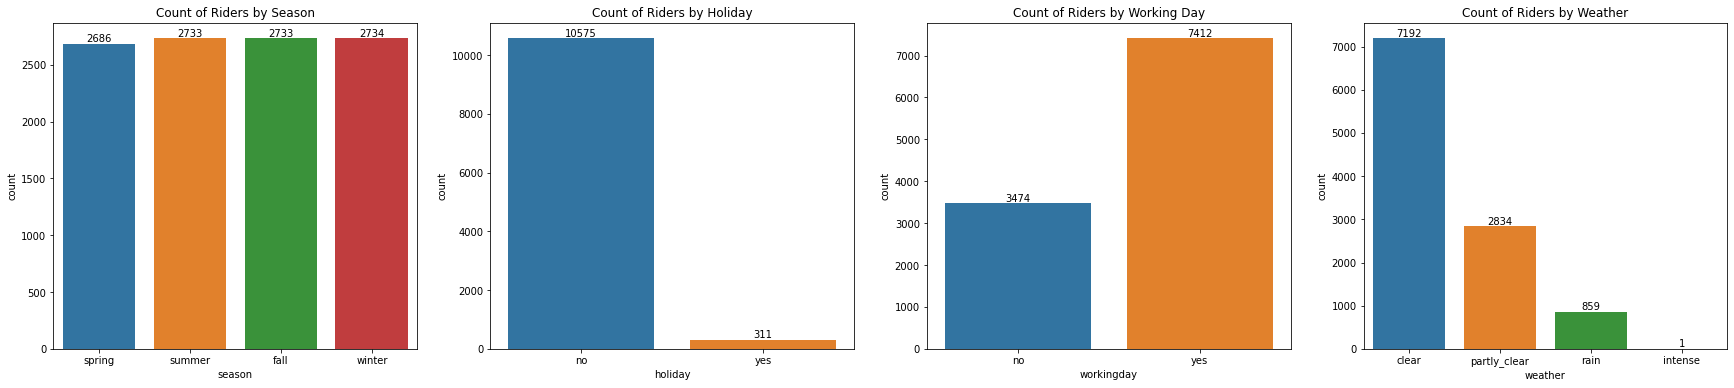

In [ ]:
fig,axes=plt.subplots(nrows=1, ncols=4, figsize=(30,6))
sns.countplot(x='season', data=yulu, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Riders by Season')
sns.countplot(x='holiday', data=yulu, ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Count of Riders by Holiday')
sns.countplot(x='workingday', data=yulu, ax=axes[2])
axes[2].bar_label(axes[2].containers[0])
axes[2].set_title('Count of Riders by Working Day')
sns.countplot(x='weather', data=yulu, ax=axes[3])
axes[3].bar_label(axes[3].containers[0])
axes[3].set_title('Count of Riders by Weather')
plt.show()

**Insights:**

    The number of riders in all seasons is almost the same.

    More number of riders (97% of them) ride on non-holidays.

    More number of riders (68% of them) ride on working days.

    Nearly 92% of the riders ride on days when the weather is clear or partly clear.

### **Univariate Analysis for Continuous Columns**

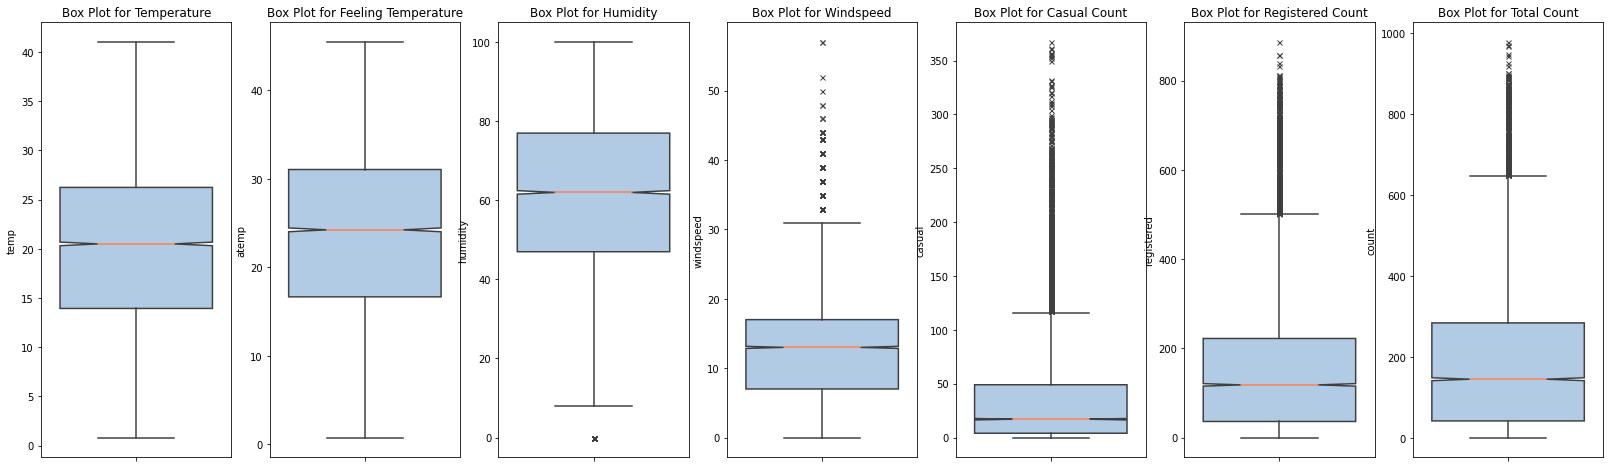

In [ ]:
fig,axes=plt.subplots(1,7,figsize=(28,8))
sns.boxplot(data=yulu, y="temp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[0])
axes[0].set_title('Box Plot for Temperature')

sns.boxplot(data=yulu, y="atemp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[1])
axes[1].set_title('Box Plot for Feeling Temperature')

sns.boxplot(data=yulu, y="humidity",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[2])
axes[2].set_title('Box Plot for Humidity')

sns.boxplot(data=yulu, y="windspeed",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[3])
axes[3].set_title('Box Plot for Windspeed')

sns.boxplot(data=yulu, y="casual",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[4])
axes[4].set_title('Box Plot for Casual Count')

sns.boxplot(data=yulu, y="registered",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[5])
axes[5].set_title('Box Plot for Registered Count')

sns.boxplot(data=yulu, y="count",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[6])
axes[6].set_title('Box Plot for Total Count')

plt.show()

**Insights:**

    The mean and the median temperature in the dataset is approximately around 20°C.

    The mean and the median feeling temperature in the dataset is approximately around 24°C.

    The mean and the median humidity in the dataset is approximately around 62%.

    The windspeed is approximately around 13, with large number of outliers.

    There is a large number of outliers for casual, registered and total count of riders between 
    1st Jan 2011 to 19th Dec 2012. That could be due to the increase in the number of riders over 
    this period. Let us investigate this with the help of time series analysis.

# **Bivariate Analysis**

### **Increase in Casual, Registered, and Total Riders over time**

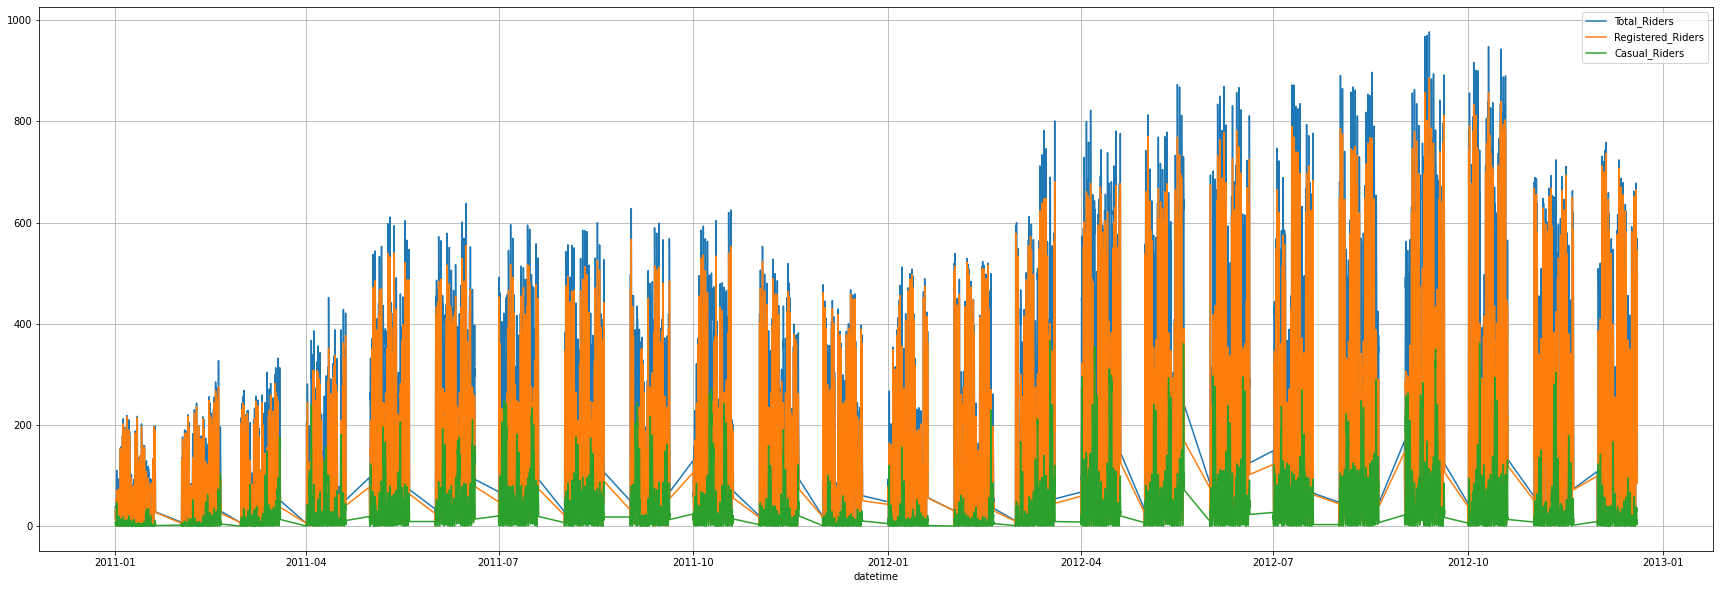

In [ ]:
plt.figure(figsize=(30,10))
sns.color_palette('husl')
sns.lineplot(x = yulu['datetime'],y = yulu['count'].values)
sns.lineplot(x = yulu['datetime'],y = yulu['registered'].values)
sns.lineplot(x = yulu['datetime'],y = yulu['casual'].values)
plt.legend(['Total_Riders','Registered_Riders','Casual_Riders'])
plt.grid()
plt.show()

**Insights:**

    The number of casual, registered and total riders has increased considerably between 
    1st Jan 2011 to 19th Dec 2012.

    There is also a definite trend and seasonality as we can see increase in number of riders 
    from spring to summer to fall and then a decrease in the number of riders in winter 
    before rising again in spring next season.

### **Distribution of Casual, Registered and Total Riders by Season**

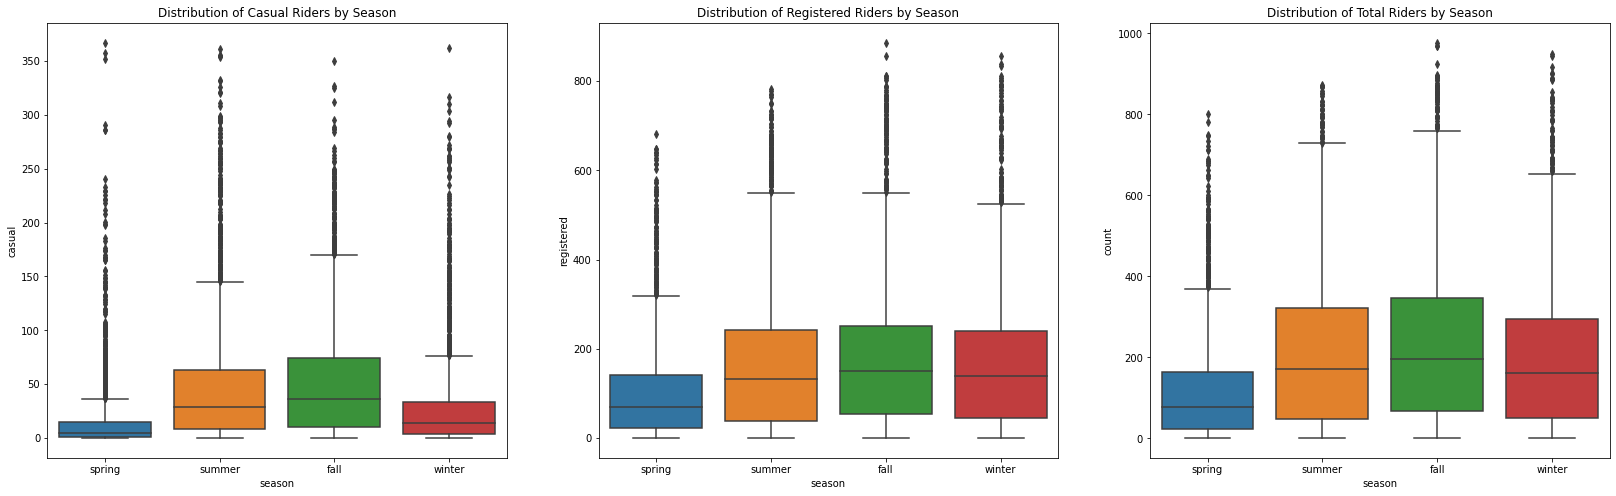

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'season', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=yulu, y="registered", x = 'season', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=yulu, y="count", x = 'season', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

**Insights:**

    The median number of casual, registered and total riders is highest in fall and summer season 
    followed by winter and spring season.

### **Distribution of Casual, Registered and Total Riders by Holiday**

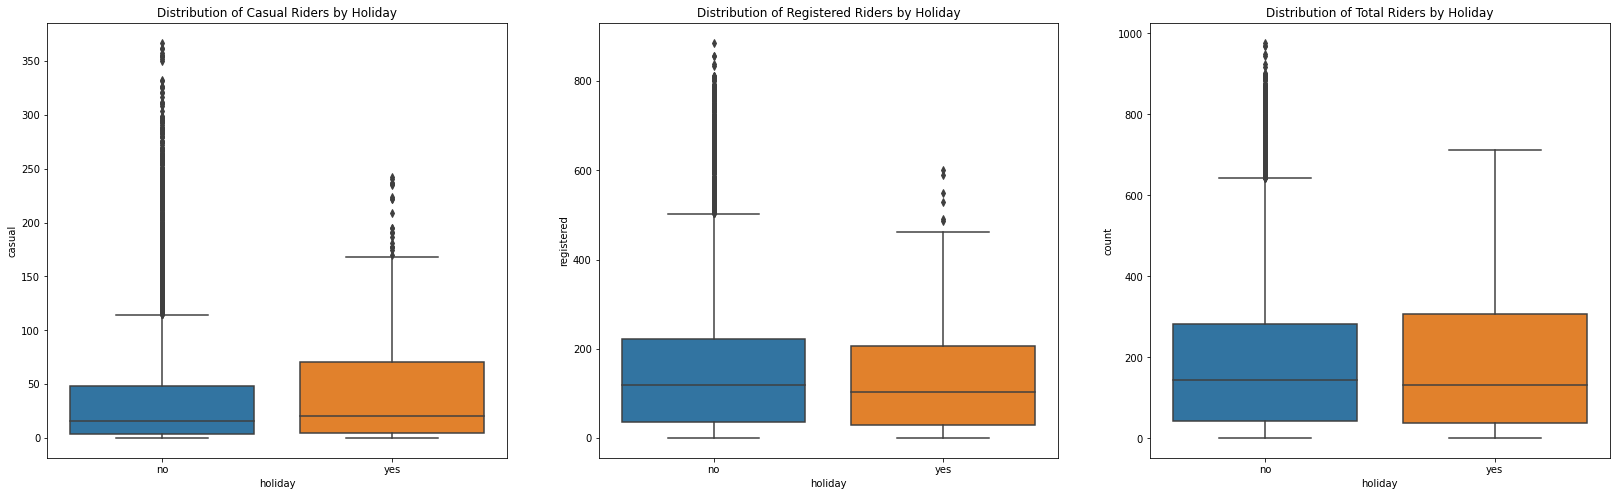

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'holiday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Holiday')

sns.boxplot(data=yulu, y="registered", x = 'holiday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Holiday')

sns.boxplot(data=yulu, y="count", x = 'holiday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Holiday')

plt.show()

**Insights:**

    The median number of casual, registered and total riders is almost equal irrespective of whether 
    it is a holiday or not.

### **Distribution of Casual, Registered and Total Riders by Working Day**

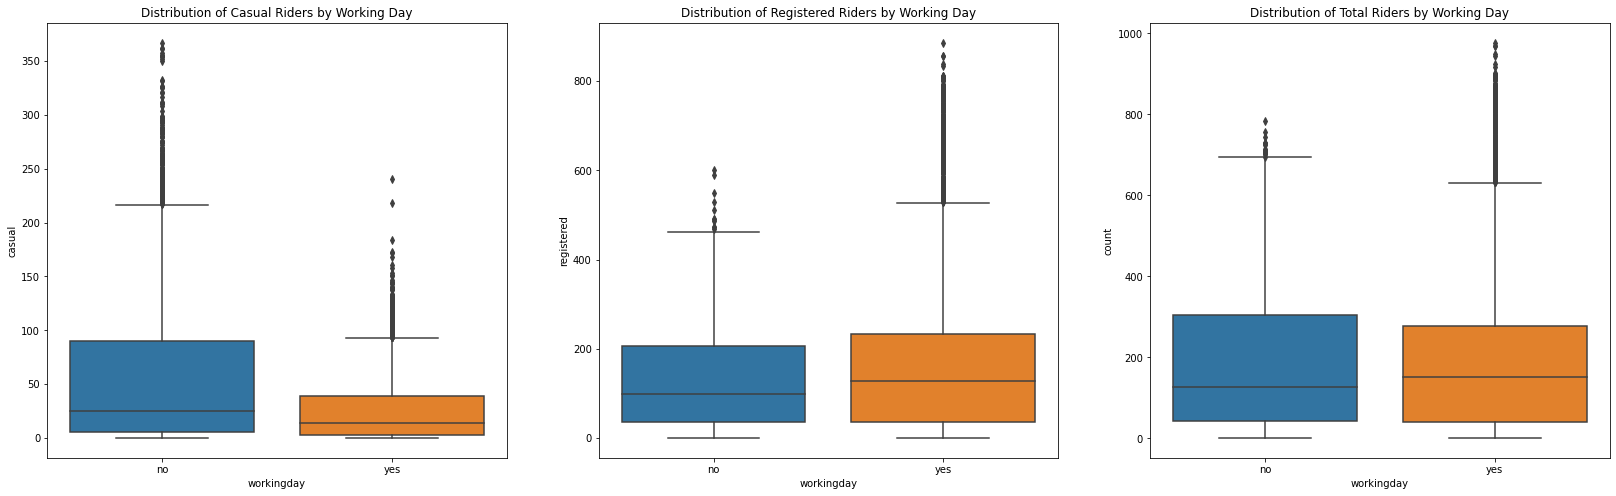

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'workingday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Working Day')

sns.boxplot(data=yulu, y="registered", x = 'workingday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Working Day')

sns.boxplot(data=yulu, y="count", x = 'workingday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Working Day')

plt.show()

**Insights:**

    The median number of casual, registered and total riders is almost equal irrespective of whether 
    it is a working day or not.

### **Distribution of Casual, Registered and Total Riders by Weather**

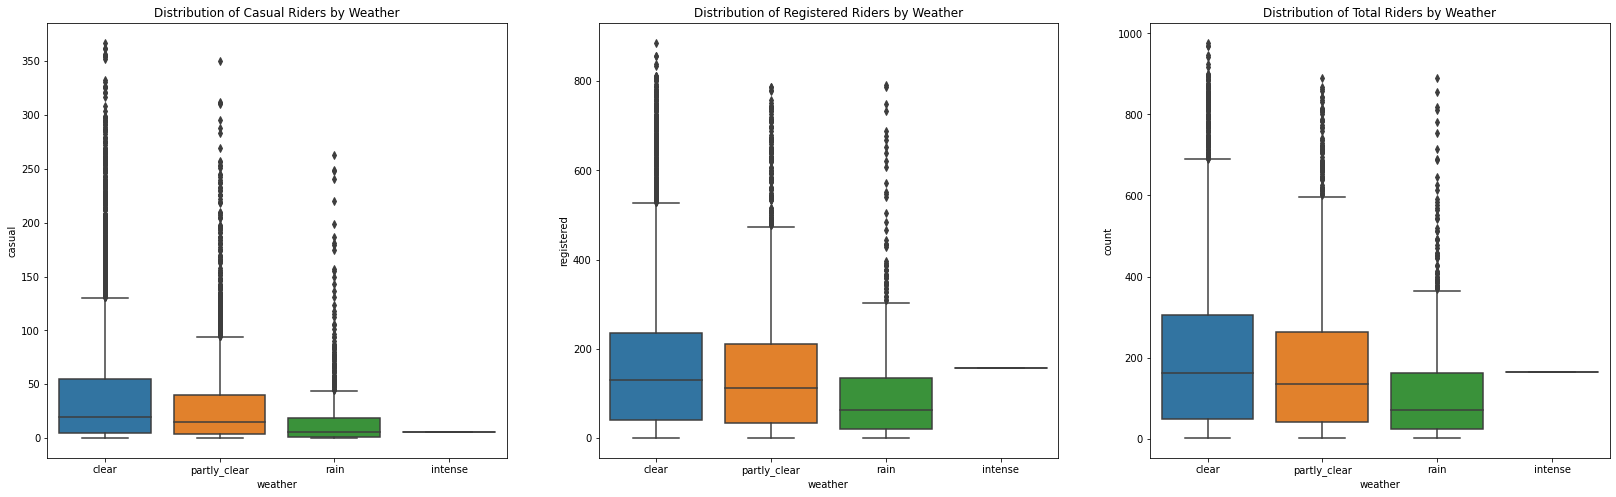

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu, y="casual", x = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Weather')

sns.boxplot(data=yulu, y="registered", x = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Weather')

sns.boxplot(data=yulu, y="count", x = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Weather')

plt.show()

**Insights:**

    The median number of casual, registered and total riders is highest when the weather is clear,
    followed by the number of casual, registered and total riders when the weather is partly_clear.

# **Univariate Analysis**

### **Distribution of Casual, Registered and Total Riders by Weather and Season**

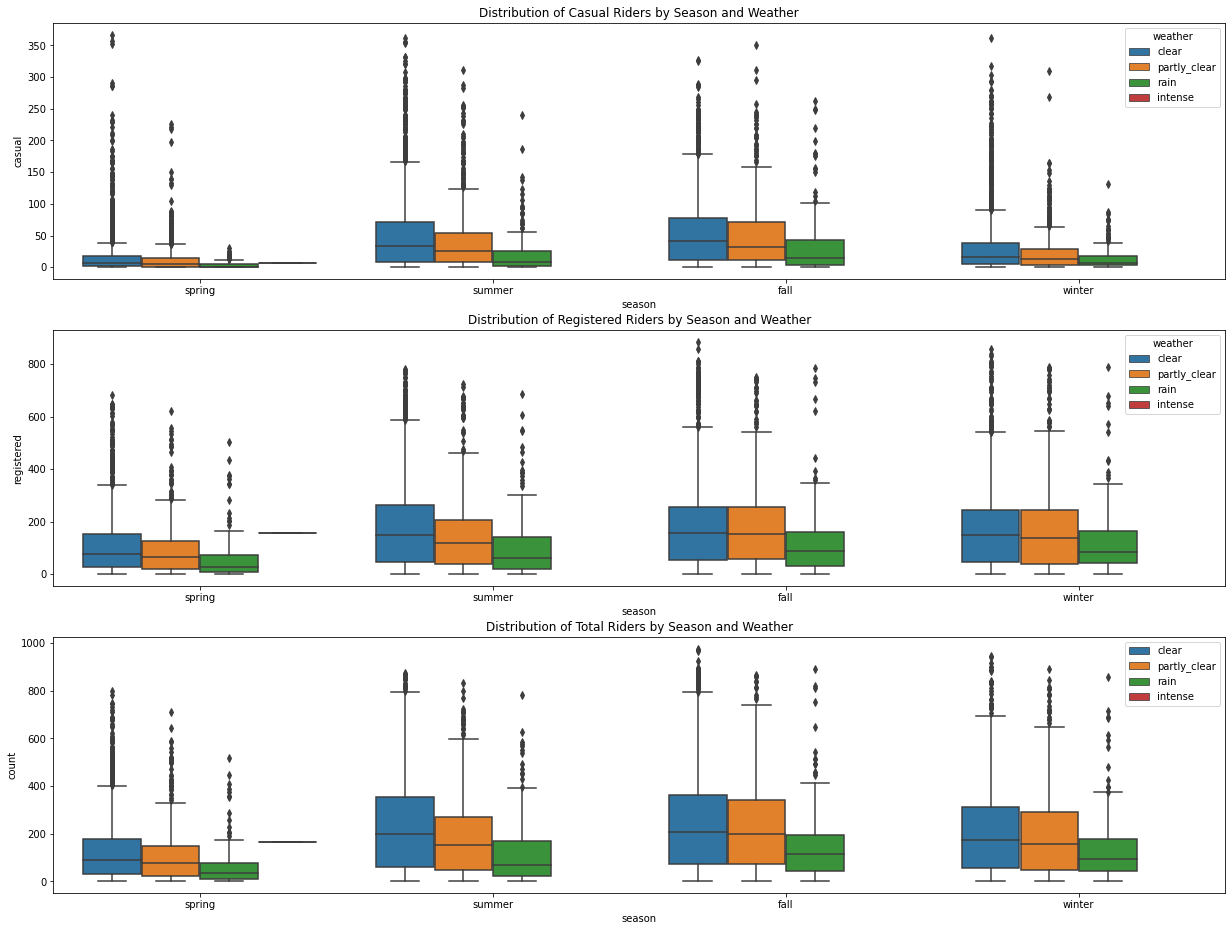

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(21,16))

sns.boxplot(data=yulu, y="casual", x = 'season', hue = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season and Weather')

sns.boxplot(data=yulu, y="registered", x = 'season', hue = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season and Weather')

sns.boxplot(data=yulu, y="count", x = 'season', hue = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season and Weather')
plt.legend(loc='upper right')
plt.show()

**Insights:**

    The number of riders in every season is highest in clear and partly_clear weather

### **Correlation among different factors**

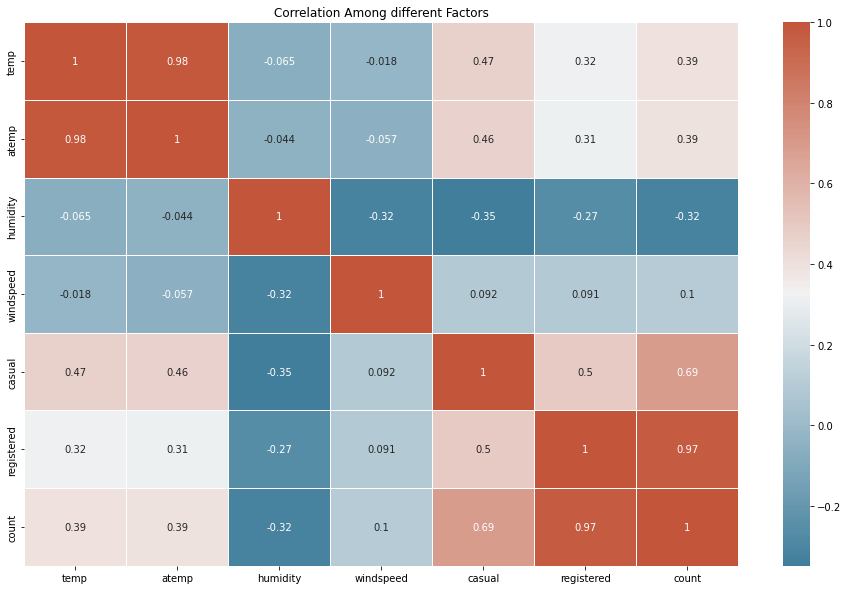

In [ ]:
yulu_corr = yulu.corr()
plt.figure(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among different Factors')
sns.heatmap(yulu_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

**Insights:**

    There is a very less correlation between {temperature, feeling temperature, humidity and windspeed} 
    and {casual, registered and count} variables.

    There is a very strong correlation between temperature and feeling temperature.

    There is a very strong correlation between casual and total riders, as casual riders
    contribute to the total number of riders for Yulu.

    There is a very strong correlation between registered and total riders, as registered riders
    contribute to the total number of riders for Yulu.

# **Relationship between Dependent and Independent Variables**

### **Effect of working day on number of electric cycles rented**

**Let us first set-up the hypothesis framework**

**Ho:** Working Day has no effect on the number of electric cycles rented

**H1:** Working Day has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Two Sample T-test

In [ ]:
working_day_no = np.array(yulu[yulu.workingday == 'no']['count'])
working_day_yes = np.array(yulu[yulu.workingday == 'yes']['count'])

In [ ]:
stats.ttest_ind(a=working_day_no, b=working_day_yes, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

**Insights:**

    Since, pvalue(0.226) is greater than Significance Level(α) i.e 0.05, we fail to reject the 
    null hypothesis that - working day has no effect on the number of electric cycles rented. 
    
    This implies that at 95% confidence level, the mean of number of riders on non-working day is 
    statistically not different from the mean number of riders on working day.

### **Effect of holiday on number of electric cycles rented**

**Let us first set-up the hypothesis framework**

**Ho:** Holiday has no effect on the number of electric cycles rented

**H1:** Holiday has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Two Sample T-test

In [ ]:
holiday_no = np.array(yulu[yulu.holiday == 'no']['count'])
holiday_yes = np.array(yulu[yulu.holiday == 'yes']['count'])

In [ ]:
stats.ttest_ind(a=holiday_no, b=holiday_yes, equal_var=True)

Ttest_indResult(statistic=0.5626388963477119, pvalue=0.5736923883271103)

**Insights:**

    Since, pvalue(0.5736) is greater than Significance Level(α) i.e 0.05, we fail to reject the 
    null hypothesis that - holiday has no effect on the number of electric cycles rented. 
    
    This implies that at 95% confidence level, the mean of number of riders on non-holiday is 
    statistically not different from the mean number of riders on holiday.

### **Number of cycles rented similar or different in different seasons**

**Let us first set-up the hypothesis framework**

**Ho:** Season has no effect on the number of electric cycles rented

**H1:** Season has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** One Way ANOVA

In [ ]:
season_spring = np.array(yulu[yulu.season == 'spring']['count'])
season_summer = np.array(yulu[yulu.season == 'summer']['count'])
season_fall = np.array(yulu[yulu.season == 'fall']['count'])
season_winter = np.array(yulu[yulu.season == 'winter']['count'])

**Let us now calculate,**

The degree of freedom(**dfn**) for different seasons, and 
    
The degree of freedom(**dfd**) for all data points within different seasons

In [ ]:
dfn = 3
dfd = len(season_spring) - 1 + len(season_summer) - 1 + len(season_fall) - 1 + len(season_winter) - 1

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import f
critical_region = f.ppf(0.95, dfn=dfn, dfd=dfd)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6057251036154376


**Let us now calculate the f-statistic based on data points**

In [ ]:
from scipy.stats import f_oneway

f_oneway(season_spring, season_summer, season_fall, season_winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

**Insights:**

    Since, pvalue(6.164843386499654e-149) is lesser than Significance Level(α) i.e 0.05, we reject the 
    null hypothesis that - season has no effect on the number of electric cycles rented. 
    
    This implies that at 95% confidence level, the mean of number of riders in different seasons is 
    statistically different for atleast one season.

### **Number of cycles rented similar or different in different weather**

**Let us first set-up the hypothesis framework**

**Ho:** Weather has no effect on the number of electric cycles rented

**H1:** Weather has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** One Way ANOVA

In [ ]:
weather_clear = np.array(yulu[yulu.weather == 'clear']['count'])
weather_partly_clear = np.array(yulu[yulu.weather == 'partly_clear']['count'])
weather_rain = np.array(yulu[yulu.weather == 'rain']['count'])
weather_intense = np.array(yulu[yulu.weather == 'intense']['count'])

**Let us now calculate,**

The degree of freedom(**dfn**) for different weather, and 
    
The degree of freedom(**dfd**) for all data points within different weather points

In [ ]:
dfn = 3
dfd = len(weather_clear) - 1 + len(weather_partly_clear) - 1 + len(weather_rain) - 1 + len(weather_intense) - 1

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import f
critical_region = f.ppf(0.95, dfn=dfn, dfd=dfd)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6057251036154376


**Let us now calculate the f-statistic based on data points**

In [ ]:
from scipy.stats import f_oneway

f_oneway(weather_clear, weather_partly_clear, weather_rain, weather_intense)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

**Insights:**

    Since, pvalue(5.482069475935669e-42) is lesser than Significance Level(α) i.e 0.05, we reject the 
    null hypothesis that - weather has no effect on the number of electric cycles rented. 
    
    This implies that at 95% confidence level, the mean of number of riders in different weather is 
    statistically different for atleast one weather

### **Dependency of Weather on Seasons**

**Let us first set-up the hypothesis framework**

**Ho:** Weather is independent on season

**H1:** Weather is dependent on season

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Chi-Square Test of Independence

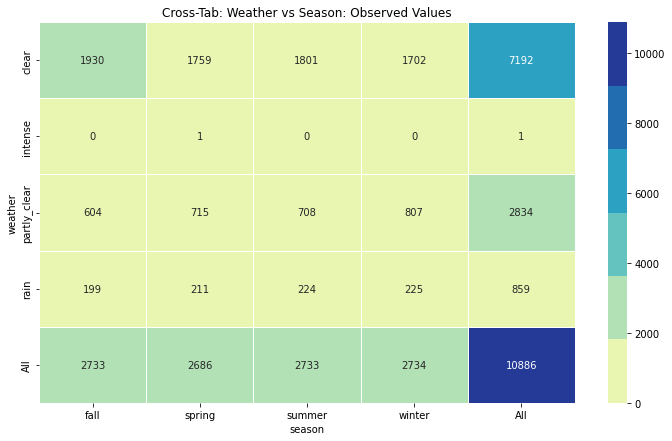

In [ ]:
df = pd.crosstab(index=yulu["weather"], columns=yulu["season"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Please Note:** We need to remove data points for intense weather conditions as for Chi-Square Test of Independence - The expected value inside each cell needs to be at least five in order for you to use this test.

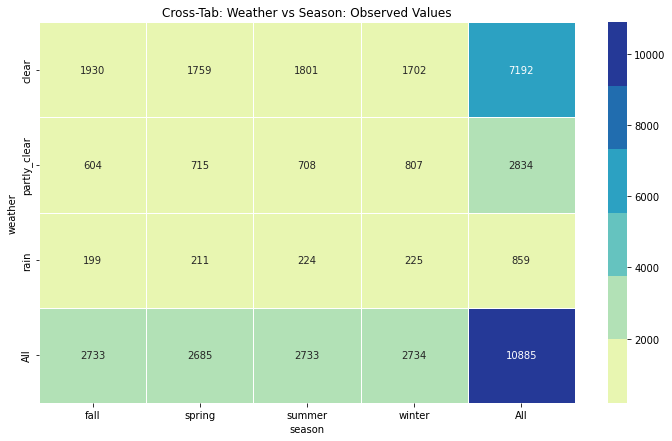

In [ ]:
df = yulu[yulu["weather"] != 'intense']
df = pd.crosstab(index=df["weather"], columns=df["season"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import chi2
chi2.ppf(q=0.95, df=6)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6057251036154376


**Let us now calculate the χ2-Statistic based on data points**

In [ ]:
from scipy.stats import chi2_contingency

observed = [[1930, 1759, 1801, 1702],
            [604, 715, 708, 807],
            [199, 211, 224, 225]]

chi2_contingency(observed)

(46.101457310732485,
 2.8260014509929403e-08,
 6,
 array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
        [ 711.55920992,  699.06201194,  711.55920992,  711.81956821],
        [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823]]))

**Insights:**

    Since, pvalue(2.8260014509929403e-08) is lesser than Significance Level(α) i.e 0.05, we reject the 
    null hypothesis that - weather is independent of season
    
    This implies that at 95% confidence level, weather is dependent on seasons.

# **Test of Normality**

### **Histogram**

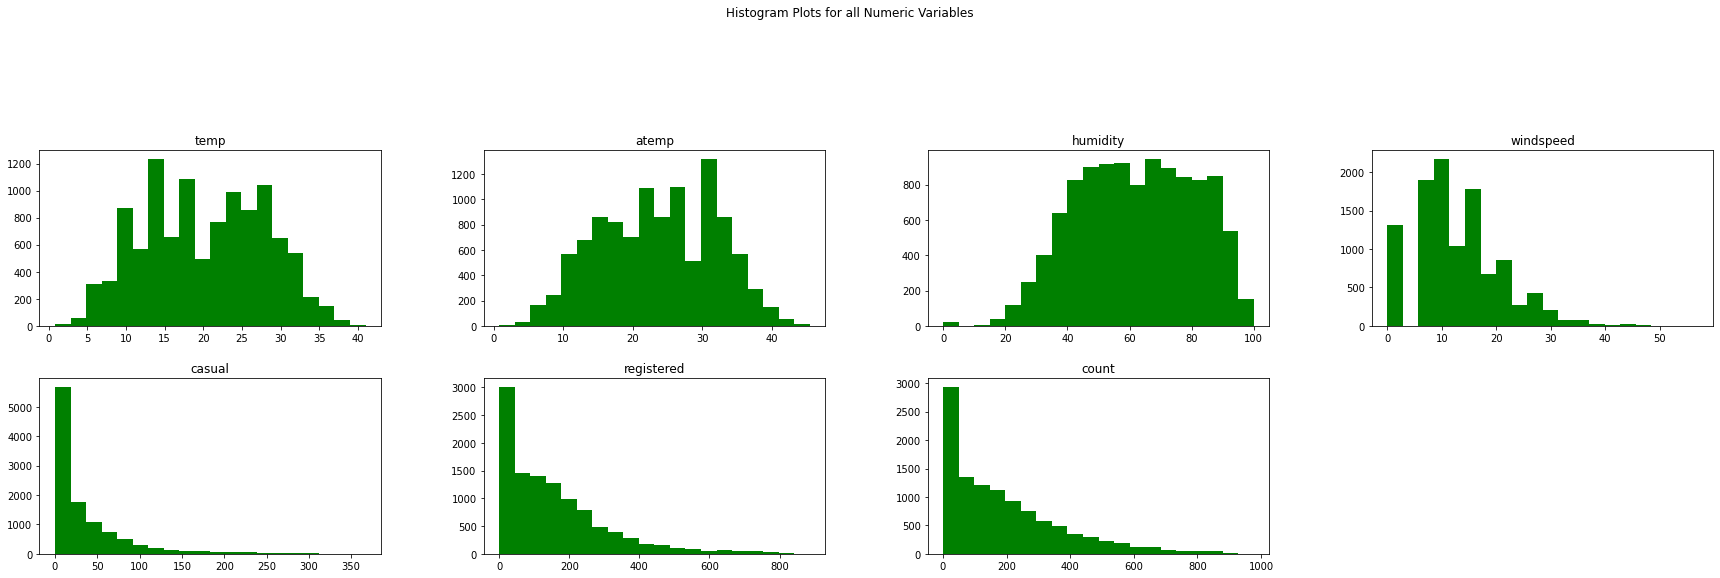

In [ ]:
yulu_cont = yulu[['temp','atemp','humidity','windspeed','casual','registered','count']]
yulu_cont.hist(layout = (5,4), color = 'green', figsize = (30,20), grid = False, bins = 20)
plt.suptitle('Histogram Plots for all Numeric Variables')
plt.show()

**Insights**

    We see from the above plot that the distribution of all the variables is skewed and
    hence are not normally distributed.

### **Q-Q Plot**

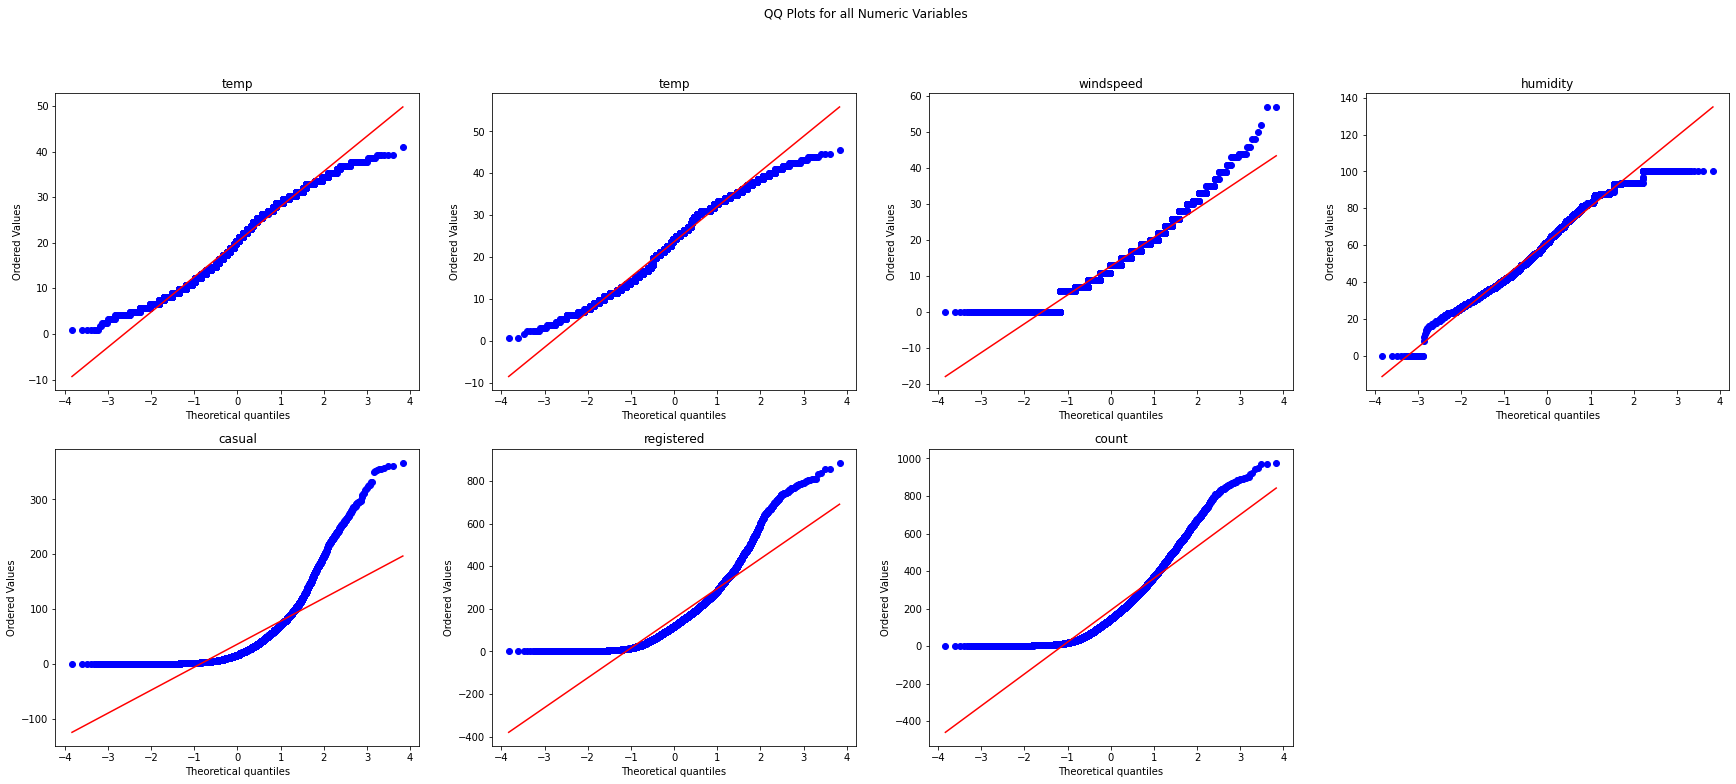

In [ ]:
import pylab 
import scipy.stats as stats

plt.figure(figsize=(30,12))

ax1 = plt.subplot(241)
res = stats.probplot(yulu_cont['temp'], dist="norm", plot=plt)
ax1 = plt.title('temp')

ax2 = plt.subplot(242)
res = stats.probplot(yulu_cont['atemp'], dist="norm", plot=plt)
ax2 = plt.title('temp')

ax3 = plt.subplot(243)
res = stats.probplot(yulu_cont['windspeed'], dist="norm", plot=plt)
ax3 = plt.title('windspeed')

ax4 = plt.subplot(244)
res = stats.probplot(yulu_cont['humidity'], dist="norm", plot=plt)
ax4 = plt.title('humidity')

ax5 = plt.subplot(245)
res = stats.probplot(yulu_cont['casual'], dist="norm", plot=plt)
ax5 = plt.title('casual')

ax6 = plt.subplot(246)
res = stats.probplot(yulu_cont['registered'], dist="norm", plot=plt)
ax6 = plt.title('registered')

ax7 = plt.subplot(247)
res = stats.probplot(yulu_cont['count'], dist="norm", plot=plt)
ax7 = plt.title('count')

plt.suptitle('QQ Plots for all Numeric Variables')
plt.show()

**Insights:**

    From the QQ-Plot we observe that none of the variables is looking straight, hence showing
    deviation from normal distribution.

### **Levene's Test**

**Levene's Test for equality of variance for number of riders for 4 different seasons**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal for all seasons

**H1:** Variance is not equal for all seasons (atleast one of the season has a variance different from the others)

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for all the seasons is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene

levene(weather_clear, weather_partly_clear, weather_rain, center ='median')

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

**Insights:**

    Since, pvalue(6.198278710731511e-36) is lesser than Significance Level(α) i.e 0.05, we reject the 
    null hypothesis that - Variance is equal for all seasons
    
    This implies that at 95% confidence level, Variance is not equal for all seasons, atleast one of
    the season has a variance different from the others

**Levene's Test for equality of variance for number of riders for 4 different weather**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal for all weathers

**H1:** Variance is not equal for all weathers (atleast one of the weather has a variance different from the others)

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for all the weathers is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene

levene(season_spring, season_summer, season_fall, season_winter, center ='median')

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

**Insight:**

    Since, pvalue(1.0147116860043298e-118) is lesser than Significance Level(α) i.e 0.05, we reject the 
    null hypothesis that - Variance is equal for all weathers
    
    This implies that at 95% confidence level, Variance is not equal for all weathers, atleast one of
    the weather has a variance different from the others.

**Levene's Test for equality of variance for number of riders as per working day**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal irrespective of working day or not

**H1:** Variance is not equal irrespective of working day or not

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for workingday or not is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene

levene(working_day_no, working_day_yes, center ='median')

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

**Insights:**

    Since, pvalue(0.9437823280916695) is greater than Significance Level(α) i.e 0.05, we fail to
    reject the null hypothesis that - Variance is equal irrespective of whether it is a working day 
    or not.
    
    This implies that at 95% confidence level, Variance is equal irrespective of whether it is a 
    working day or not.

**Levene's Test for equality of variance for number of riders as per holiday**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal irrespective of holiday or not

**H1:** Variance is not equal irrespective of holiday or not

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for holiday is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene

levene(np.array(yulu[yulu.holiday == 'no']['count']), np.array(yulu[yulu.holiday == 'yes']['count']), center ='median')

LeveneResult(statistic=1.222306875221986e-06, pvalue=0.9991178954732041)

**Insights:**

    Since, pvalue(0.9991178954732041) is greater than Significance Level(α) i.e 0.05, we fail to
    reject the null hypothesis that - Variance is equal irrespective of whether it is a holiday 
    or not.
    
    This implies that at 95% confidence level, Variance is equal irrespective of whether it is a 
    holiday or not.

### **Shapiro-Wilk Test**

**Shapiro-Wilk Test is used to test Normality.**

**Assumption:** The sample is coming from a normal distribution

**Setting up Hypothesis Framework**

**Ho:** Sample comes from a normal distribution

**H1:** Sample is not coming from a population which is normally distributed

**Significance Level(α):** 0.05 or 5%

In [ ]:
from scipy.stats import shapiro

print('Insights:')
print(end = '\n')

for i in list(yulu_cont.columns):

  test_statistic, p_value = stats.shapiro(yulu_cont[i])

  print('********************************************************************************************')

  print(f'The test-statistic for {i} is {test_statistic} with p_value {p_value}')

  if p_value > 0.05:

    print('Hence at 95% confidence level, we fail to reject null hypothesis')
    print(f'Hence we can say that {i} is coming from normally distributed population')

  else:
    print('Hence at 95% confidence level, we reject null hypothesis')
    print(f'Hence we can say that {i} is not coming from normally distributed population')

  print('********************************************************************************************')
  print(end = '\n')


Insights:

********************************************************************************************
The test-statistic for temp is 0.9804092645645142 with p_value 4.47221826500091e-36
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that temp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for atemp is 0.9815691709518433 with p_value 3.4538982852050647e-35
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that atemp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for humidity is 0.9822689294815063 with p_value 1.24549699091

# **Recommendations:**



    1) As from 2 Sample T-test we have seen that holiday has no impact on the number of riders 
    at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective 
    of whether it is a holiday or not.

    2) As from 2 Sample T-test we have seen that working day has no impact on the number of riders 
    at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective 
    of whether it is a working day or not.

    3) As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically 
    different at 95% confidence level for different seasons, Yulu should have different strategies
    for different seasons. Yulu should try to increase the riders in the months of fall and winter 
    when the number of riders goes down considerably and maximize capacity utilization of e-bikes
    in the months of summer and fall.

    4) As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically 
    different at 95% confidence level for different weathers, Yulu should have different strategies
    for different weathers. Yulu should try to maximize the capacity utilization of e-bikes
    when the weather is clear or partly clear.

    5) As we have seen from Chi-Square Test that weather is dependent on seasons at 95% confidence level. 
    Yulu should maximize the capacity utilization or rides in every season when the weather is 
    clear or partly_clear.

    6) Yulu should perform demand forecasting as we have seen that there is trend and seasonality 
    in the data. Better demand forecasting will lead to better capacity utilization of e-bikes
    in different seasons.

    7) Yulu should also perform further investigation into the riders based on gender and age as 
    insights into age bracket and gender would reveal a lot about the week on week capacity 
    utilization on the type of customers preferring Yulu e-bikes.

    
